# Исследование объявлений о продаже квартир

Сервис по сделкам с недвижимостью предоставил архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости, выделить параметры, влияющие на ценообразование. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта**

Проанализировать архив объявлений о продаже недвижимости в Санкт-Петербурге и Ленинградской области для установления факторов, влияющих на рыночную стоимость объектов.

**Задачи проекта**

1. Изучить набор данных на предмет наличия пропусков, аномальных значений, данных с некорректными типами для их последующего восстановления и правки. Описать возможные причины происхождения подобных явлений.

2. Добавить в таблицу дополнительные метрики для выявления закономерностей.

3. Выявить наличие (или отсутствие) взаимосвязей между факторами и рыночной стоимостью жилой недвижимости.

## Предварительное изучение данных

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Загрузим данные.

In [2]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(realty[realty['studio']==True].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
1173,12,3240000.0,29.00,2018-10-30T00:00:00,0,NaN,24.0,17.00,2,NaN,True,False,NaN,2.0,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0
1174,3,3900000.0,32.00,2016-10-18T00:00:00,0,2.70,24.0,18.00,2,NaN,True,False,NaN,2.0,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0
1220,5,3300000.0,27.00,2017-11-10T00:00:00,0,2.80,17.0,20.00,16,NaN,True,False,NaN,NaN,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0
1260,0,2600000.0,27.00,2018-07-20T00:00:00,0,2.70,16.0,16.00,4,NaN,True,False,NaN,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0
1277,10,3150000.0,26.00,2017-07-14T00:00:00,0,2.75,21.0,17.38,11,NaN,True,False,NaN,NaN,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0


Выведем общую информацию по датафрейму.

In [3]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбцах много пропущенных значений, не все типы данных корректны. Проверим заголовки столбцов на наличие лишних символов.

In [4]:
print(realty.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


В целом, с заголовками трудностей нет, только приведем название столбца с удаленностью от центра (cityCenters_nearest) к общему формату.

In [5]:
realty = realty.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Посмотрим, насколько разнятся данные между собой, нет ли каких-то аномальных значений.

In [6]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В датасете обнаружен ряд необычных объектов. Например, в столбце total_area есть недвижимость площадью 900 кв.м. Хотя, теоретически кто-то может продавать большой загородный дом. В колонке days_exposition минимальное количество дней экспозиции рекламного объявления - 1 день. Это очень малый срок. Но самые странные значения в колонке ceiling_height: здесь высота потолков колеблется от 1м до 100 м.

Проверим, имеются ли в наборе данных дубликаты.

In [7]:
print('Количество дубликатов в наборе данных: {}'.format(realty.duplicated().sum()))

Количество дубликатов в наборе данных: 0


### Вывод

В наборе данных 23699 строк и 22 столбца.

Очень много пропущенных значений (в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, days_exposition).

Ряд столбцов имеет несоответствующий формат данных: first_day_exposition - формат object вместо даты, is_apartment — апартаменты (нужен булев тип), floors_total, balcony, parks_around3000, ponds_around300 и days_exposition - float64 вместо int.

Заголовки стандартные, cityCenters_nearest единственный выделяется из общей картины, его название изменено на city_сenters_nearest.

Среди данных также были найдены выбивающиеся из общего ряда показатели. Например, в графе с общей площадью (total_area) найден дворец с метражом 900 кв. В целом, такой объект может существовать в действительности (например, большой загородный дом с видом на Финский залив или трехэтажный пентхаус на вершине современной башни).

Особый интерес вызывает графа с характеристикой потолков (ceiling_height). Квартиры-норки высотой 1 м и 100-метровое сооружение (которое, судя по высоте, является Исаакиевским собором) явно требуют пристального изучения.

Также кажутся необычными размещения рекламы всего на один день (days_exposition = 1). Это может случаться, если аналогичное объявление было опубликовано в других сервисах гораздо раньше (например, на ЦИАН), и покупатель пришел именно оттуда. Либо собственник по какой-то причине передумал продавать объект. Или случилось чудо, и квартира реально была продана за 1 день. В любом случае, необходимо проверить количество стремительных продаж.

В airports_nearest минимальное расстояние = 0. Это очень странное значение, будто квартира находится прямо в аэропорту. С другой стороны, колонка в исследовании не участвует, поэтому преобразовываться не будет. Аэропорты располагаются далеко от центра, как правило, за чертой города. Поэтому здесь на цену больше влияет не шум самолетов над головой, а удаленность от центра, транспорта и прочей инфраструктуры.

Явных дубликатов в наборе данных не выявлено.

## Предобработка данных

Сразу проверим, много ли объявлений публиковалось в сервисе на срок 1-2 дня.

In [8]:
display(realty.groupby('days_exposition')['days_exposition'].count())

days_exposition
1.0         1
2.0         3
3.0       158
4.0       176
5.0       152
         ... 
1512.0      2
1513.0      1
1553.0      1
1572.0      1
1580.0      1
Name: days_exposition, Length: 1141, dtype: int64

Количество срочных объявлений крайне мало, их вполне можно списать на случайное совпадение. Оставим колонку в первозданном виде.

В датафрейме много пропущенных значений. Посчитаем, какова доля пропусков по каждому столбцу.

In [9]:
print(realty.isnull().sum() / len(realty))

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64


Очень мало пропусков в столбцах с общей этажностью дома и названием населенного пункта. Эти неполные строки можно удалить.

In [10]:
realty.dropna(subset = ['floors_total', 'locality_name'], inplace=True)

Сложнее обстоят дела с жилой площадью и площадью кухни (8% и 9,6% пропусков от всего датасета соответственно).
Можно заменить их площади средним или медианным значением. Но подобная замена может сильно исказить данные, поскольку не учтет общую площадь объекта. Например, в результате в отдельных строках жилая площадь может оказаться больше общей (для маленьких квартир).
Для более корректного представления данных в пустующих "ячейках" столбца (living_area) высчитана средняя доля жилой площади относительно площади общей (назовем эту долю коэффициентом комнаты).
Далее в строках с отсутствующими значениями пропуски заполняются произведением общей площади на коэффициент комнаты.

In [11]:
room_koef = (realty['living_area'] / realty['total_area']).mean()
print('Доля жилой площади в общей (коэффициент комнаты): {:.2f}'.format(room_koef))
realty['living_area'] = realty['living_area'].fillna(room_koef*realty['total_area'])

Доля жилой площади в общей (коэффициент комнаты): 0.56


Площадь кухни расчитывается похожим образом, но с одной поправкой. Из общей площади сначала вычитается площадь жилая (чтобы исключить вероятность появления огромной кухни там, где большая общая площадь из-за наличия большого количества комнат), а потом считается среднее отношение площади кухни к разности между площадью общей и жилой (назовем получившуюся долю коэффициентом кухни).
Далее пропуски в столбце (kitchen_area) заполняются произведением коэффициента на разность между общей площадью и жилой)

In [12]:
kitchen_koef = (realty['kitchen_area'] / (realty['total_area'] - realty['living_area'])).mean()
print('Доля площади кухни в общей без жилой (коэффициент кухни): {:.2f}'.format(kitchen_koef))
realty['kitchen_area'] = realty['kitchen_area'].fillna(room_koef*(realty['total_area'] - realty ['living_area']))

Доля площади кухни в общей без жилой (коэффициент кухни): 0.43


Пропуски в столбце наличия балкона заменены нулем. В данном случае будем считать, что балкон отсутствует.

In [13]:
realty['balcony'] = realty['balcony'].fillna(0)
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Заменим отсутствующие показатели высоты потолков (ceiling_height). Но сначала проверим, много ли в датасете строчек с экстремальными значениями (вроде высоты потолка в 1 м или 100м).

In [14]:
print(realty.groupby('ceiling_height')['ceiling_height'].count().head(10))
print(realty.groupby('ceiling_height')['ceiling_height'].count().tail(20))

ceiling_height
1.00     1
1.20     1
1.75     1
2.00    11
2.20     1
2.25     1
2.30     4
2.34     1
2.40    23
2.45    15
Name: ceiling_height, dtype: int64
ceiling_height
5.0      1
5.2      1
5.3      2
5.5      1
5.6      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64


В столбце много значений, которые требуют корректировки. Пока оставим их для просмотра характера распределения. Пропуски заменим средним или медианой (их посчитаем по датасету, предварительно отфильтровав аномальные значения).

In [15]:
print('Среднее значение высоты потолков: {:.2f}'.format(realty.query('9 >= ceiling_height >= 2.4')['ceiling_height'].mean()))
print('Медианное значение высоты потолков: {:.2f}'.format(realty.query('9 >= ceiling_height >= 2.4')['ceiling_height'].median()))
print('Отношение медианного значения к среднему: {:.2f}'.format(realty.query('9 >= ceiling_height >= 2.4')['ceiling_height'].median() / realty.query('9 >= ceiling_height >= 2.4')['ceiling_height'].mean()))

Среднее значение высоты потолков: 2.73
Медианное значение высоты потолков: 2.65
Отношение медианного значения к среднему: 0.97


Заменим пропуски средним. Процент пропусков большой, поэтому сохраним отдельно датафрейм без замен и нулевых значений. Его мы используем позже для проверки, правильным ли было наше решение о замене.

In [16]:
ceil_real = pd.DataFrame(data = realty[realty['ceiling_height'].notnull()], columns = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'locality_name', 'city_centers_nearest'])
print(ceil_real.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14481 entries, 0 to 23698
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            14481 non-null  float64
 1   total_area            14481 non-null  float64
 2   rooms                 14481 non-null  int64  
 3   ceiling_height        14481 non-null  float64
 4   locality_name         14481 non-null  object 
 5   city_centers_nearest  11540 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 791.9+ KB
None


В основном датафрейме пропуски заменяем средним значением.

In [17]:
ceil_mean = round(realty.query('9 >= ceiling_height >= 2.4')['ceiling_height'].mean(),2)
realty['ceiling_height'] = realty['ceiling_height'].fillna(ceil_mean)
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Проверим, есть ли возможность заменить пропущенные значения в столбце расстояния до центра (city_сenters_nearest). Для этого посчитаем среднее расстояние от центра для каждого населенного пункта и выведем уникальные значения населенных пунктов, где данные отсутствуют.

In [18]:
mean_to_center = realty[realty['city_centers_nearest'].notnull()].groupby('locality_name')['city_centers_nearest'].mean()
print(mean_to_center)
print(realty[realty['city_centers_nearest'].isnull()]['locality_name'].unique())

locality_name
Зеленогорск                54617.583333
Колпино                    32113.771513
Красное Село               30034.741379
Кронштадт                  49195.726316
Ломоносов                  50739.969697
Павловск                   33206.921053
Петергоф                   35468.925373
Пушкин                     28745.375000
Санкт-Петербург            11588.493939
Сестрорецк                 34624.480874
поселок Лисий Нос          28246.000000
посёлок Александровская    27468.000000
посёлок Белоостров         38868.000000
посёлок Левашово           25727.000000
посёлок Лисий Нос          27297.000000
посёлок Металлострой       27561.348485
посёлок Молодёжное         65529.200000
посёлок Парголово          19924.776758
посёлок Песочный           26475.250000
посёлок Петро-Славянка     27165.000000
посёлок Понтонный          32293.450000
посёлок Репино             43392.250000
посёлок Сапёрный           35854.666667
посёлок Стрельна           23374.302326
посёлок Усть-Ижора        

Имена населенных пунктов (locality_name) с расстояниями до центра и населенных пунктов с пропусками не совпадают. Это значит, что адекватное заполнение пропусков в столбце (city_centers_nearest) требует использования внешних источников. Оставим пока графу без изменений, но будем иметь в виду наличие там пропусков.

Заменим типы данных в ряде параметров для дальнейшего анализа.

In [19]:
realty['floors_total'] = realty['floors_total'].astype('int')
realty['balcony'] = realty['balcony'].astype('int')
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Проверим, появились ли случайно в наборе данных дубликаты в результате правки значений параметров.

In [20]:
print('Количество дубликатов в наборе данных: {}'.format(realty.duplicated().sum()))

Количество дубликатов в наборе данных: 0


### Вывод

В столбцах living_area, kitchen_area, balcony NaN заменены на наиболее подходящие значения. Ряд строк с пропусками в графах floors_total и locality_name удален (0.3% и 0.2% соответственно).

Сложнее с пропусками в ceiling_height. Здесь доля пропусков очень большая (почти 40%), поэтому результаты, полученные при замене, могут сильно отличаться от реальности. В итоге в основном датафрейме было решено заменить пропуски средним, однако, также сохранить отдельно часть датафрейма с удаленными NaN для последующей проверки.
Наиболее вероятная причина отсутствия данных по потолкам в том, что клиенты не указали этот параметр. Забыли или сами не знают (например, после ремонта что указывать - внутреннюю высоту бетонной коробки или высоту до натяжного потолка?).

В случае с city_centers_nearest пропуски непросто заменить, поскольку по населенным пунктам с отсутствующими значениями вообще нет данных и в других строках. Пропуски в расстояниях от центра скорее всего возникли из-за того, что данные попадают в датасет из базы, где проставлены координаты GPS. А у этих населенных пунктов координат нет в базе.

Графу days_exposition решено оставить без изменений. Форматы колонок floors_total и balcony переведены в целочисленный. Явные дубликаты в датасете отсутствуют.

## Добавление и изменение признаков

Вычислим стоимость одного квадратного метра и добавим в новый столбец (price_per_meter).

In [21]:
realty['price_per_meter'] = realty['last_price'] / realty['total_area']

Колонку с датой публикации (first_day_exposition) разобъем на четыре самостоятельных столбца для дальнейшего анализа (день недели, дата, месяц и год публикации объявления).

In [22]:
realty['day_exposition'] = realty['first_day_exposition'].dt.strftime('%A')
realty['data_exposition'] = realty['first_day_exposition'].dt.day
realty['month_exposition'] = realty['first_day_exposition'].dt.month
realty['year_exposition'] = realty['first_day_exposition'].dt.year
display(realty.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,data_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,Thursday,7,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.73,11,18.600000,1,NaN,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,Tuesday,4,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.73,5,34.300000,4,NaN,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,Thursday,20,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.73,14,89.825011,9,NaN,False,False,39.079523,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,Friday,24,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,Tuesday,19,6,2018


Добавим в набор данных колонку с типами этажей (первый, последний и другие).

In [23]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

realty['floor_type'] = realty.apply(floor_status, axis=1)
print(realty['floor_type'].value_counts())

другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
realty['room_ratio'] = realty['living_area'] / realty['total_area']
realty['kitchen_ratio'] = realty['kitchen_area'] / realty['total_area']

### Вывод

Для дальнейшего исследования рынка недвижимости и выявления факторов, влияющих на ценообразование, в набор данных добавлены следующие столбцы: цена за квадратный метр, тип этажа, соотношения площадей комнаты и кухни. Колонка с временем публикации разбита на четыре отдельных столбца (день недели, дата, месяц и год).

## Исследовательский анализ данных

### Поиск выбросов, удаление экстремальных значений

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для каждого параметра построим гистограммы и боксплоты для визуализации выбросов. Также объявим функцию для расчета границы выбросов.

In [25]:
def find_outliers (series):
    outliers_up = ((series.describe()['75%'] - series.describe()['25%'])*1.5 + series.describe()['75%']).round(1)
    outliers_down = (series.describe()['25%'] - (series.describe()['75%'] - series.describe()['25%'])*1.5).round(1)
    print('Нижняя и верхняя границы выбросов: {}, '.format(outliers_down), '{}'.format(outliers_up))

#### Площадь

Построим распределение недвижимости по площади объекта.

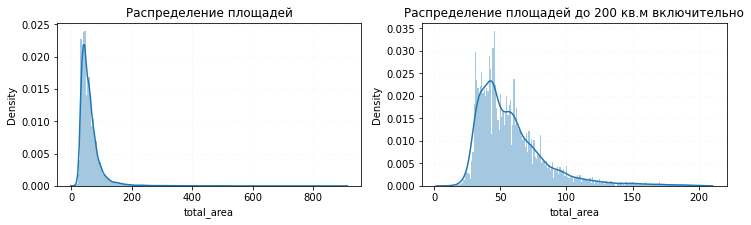

In [26]:
fig, ax= plt.subplots(ncols=2, figsize=(12,3))
sns.distplot(realty['total_area'], bins=200, ax=ax[0])
sns.distplot(realty[realty['total_area'] <= 200]['total_area'], bins=200, ax=ax[1])
ax[0].set(title='Распределение площадей')
ax[0].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[1].set(title='Распределение площадей до 200 кв.м включительно')
ax[1].grid(alpha=0.05, linestyle='--', linewidth=1)

Больше всего в продаже малогабаритных квартир. График не выглядит идеальным, на нём множество выступов и длинный узкий хвост из недвижимости большой площади. 
Для поиска выбросов построим боксплот и рядом увеличенную часть графика, чтобы лучше определить границу аномальных значений.

(100.0, 700.0)

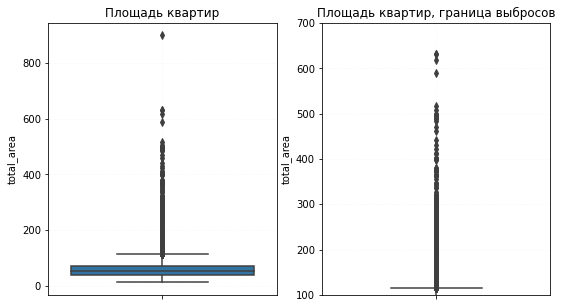

In [27]:
fig, ax= plt.subplots(ncols=2, figsize=(9,5))
sns.boxplot(y=realty['total_area'], ax=ax[0])
ax[0].set_title('Площадь квартир')
ax[0].grid(alpha=0.05, linestyle='--', linewidth=1)

sns.boxplot(y=realty['total_area'], ax=ax[1])
ax[1].set_title('Площадь квартир, граница выбросов')
ax[1].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[1].set_ylim(100, 700)

Выбросы есть по верхним значениям. Рассчитаем границу, после которой данные можно считать выбросами. Воспользуемся объявленной ранее функцией find_outliers().

In [28]:
find_outliers(realty['total_area'])

Нижняя и верхняя границы выбросов: -4.6,  114.2


Все, что выше этой границы, из набора данных удаляем.

In [29]:
realty = realty.query('total_area < 114')

#### Цена за квадратный метр

Посмотрим на график распределения цен за квадратный метр.

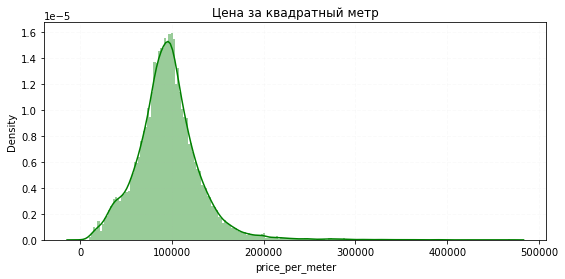

In [30]:
plt.figure(figsize=(9,4))
ax = sns.distplot(realty[realty['price_per_meter']<=500000]['price_per_meter'], bins=200, color='green')
ax.set(title='Цена за квадратный метр')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

В целом график выглядит неплохо: почти правильный колокол говорит о нормальном распределении, форма узкая вытянутая. Единственный нюанс - длинный хвост в сторону увеличения стоимости за квадратный метр. Это говорит о том, что в наборе есть очень узкий сегмент крайне дорогих квартир, который может повлиять на дальнейшие оценки. 

Чтобы понять, какие именно цены считаются аномальными, построим боксплот и рассчитаем границу начала выбросов.

(5000.0, 25000.0)

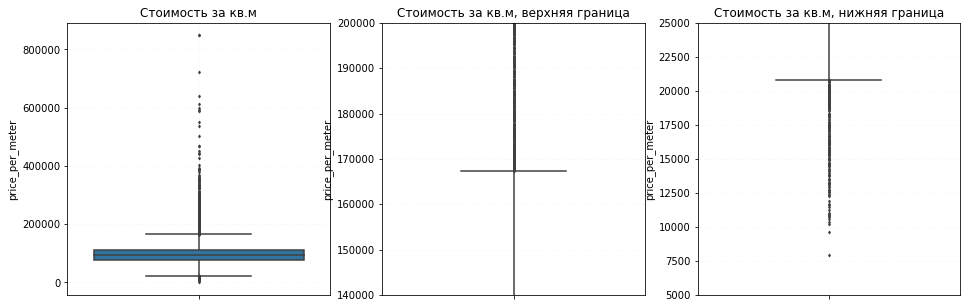

In [31]:
fig, ax= plt.subplots(ncols=3, figsize=(16,5))
sns.boxplot(y=realty['price_per_meter'], fliersize=2, ax=ax[0])
ax[0].set_title('Стоимость за кв.м')
ax[0].grid(alpha=0.05, linestyle='--', linewidth=1)

sns.boxplot(y=realty['price_per_meter'], fliersize=2, ax=ax[1])
ax[1].set_title('Стоимость за кв.м, верхняя граница')
ax[1].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[1].set_ylim(140000, 200000)

sns.boxplot(y=realty['price_per_meter'], fliersize=2, ax=ax[2])
ax[2].set_title('Стоимость за кв.м, нижняя граница')
ax[2].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[2].set_ylim(5000, 25000)

Выбросы есть по верхней и нижней границам. Рассчитаем их и удалим записи, которые за них заходят.

In [34]:
find_outliers(realty['price_per_meter'])

Нижняя и верхняя границы выбросов: 20830.5,  167302.7


Удаляем выбросы.

In [35]:
realty = realty.query('20830.5 < price_per_meter < 167302.7')

#### Количество комнат

Рассмотрим, как распределено количество комнат.

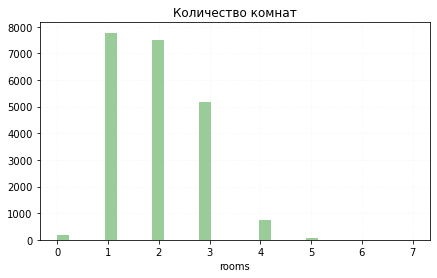

In [36]:
plt.figure(figsize=(7,4))
ax = sns.distplot(realty['rooms'], kde=False, bins=30, color='green')
ax.set(title='Количество комнат')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Гистограмма выглядит вполне предсказуемо. Большинство предложений на рынке - однокомнатные или двухкомнатные квартиры. Есть небольшой выступ у комнат со значением 0, но здесь, скорее всего, речь идет о маленьких квартирах-студиях или квартирах со свободной планировкой, где комната физически не выделена (не отгорожена стеной от остальных помещений).

Построим боксплот.

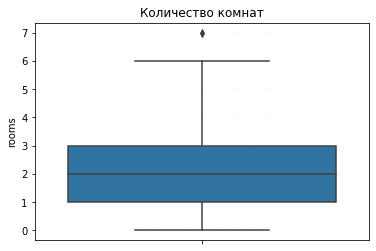

In [37]:
ax = sns.boxplot(y=realty['rooms'])
ax.set_title('Количество комнат')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Судя по графику, выбросом считается только одно значение, оно же максимальное: 7 комнат. Проверим это методом describe().

In [38]:
print('Максимальное количество комнат: {}'.format(realty['rooms'].describe()['max']))

Максимальное количество комнат: 7.0


Удаляем.

In [39]:
realty = realty.query('rooms != 7')

#### Высота потолков

Посмотрим, как распределяются объекты по высоте потолков.

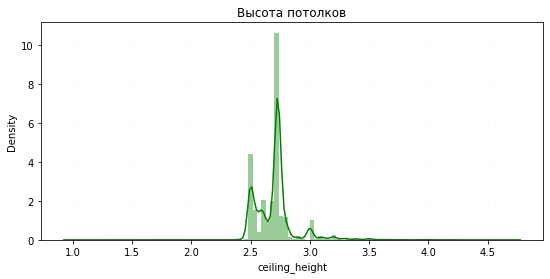

In [40]:
plt.figure(figsize=(9,4))
ax = sns.distplot(realty[realty['ceiling_height'] <= 5]['ceiling_height'], bins=100, color='green')
ax.set(title='Высота потолков')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Гистограмма выглядит нетрадиционно, огромные выступы на значениях 2,5 и 2,7 м. Теоретически можно объяснить, что строятся дома из стандартных блоков, имеющих одинаковые размеры. Вот и получаются одинаковые высоты. Но здесь нужно вспомнить, что ранее пропущенные значения меняли на среднее (оно равно 2,73м), что тоже могло повлиять на статистику. Проверим, график действительно похож на реальный или это мы так посчитали, что все исказили.

Построим новую гистограмму на основании реальных данных, где все NaN были удалены, а не заменены.

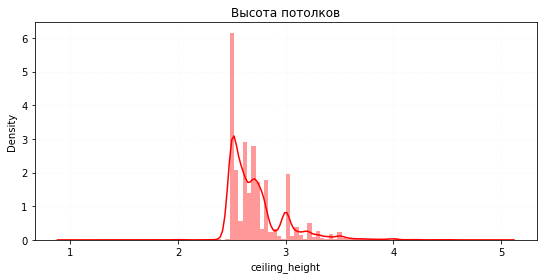

In [41]:
plt.figure(figsize=(9,4))
ax = sns.distplot(ceil_real[ceil_real['ceiling_height'] <= 5]['ceiling_height'], bins=100, color='red')
ax.set(title='Высота потолков')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Здесь распределение имеет другую форму. Очевидно, что основной пик предыдущего графика носит рукотворный характер. И чаще всего можно встретить помещения с высотой потолков 2,5 м нежели 2.7.

Построим боксплоты по потолкам для наглядного представления размаха вариации (для основного и дополнительного датафреймов).

(1.0, 3.5)

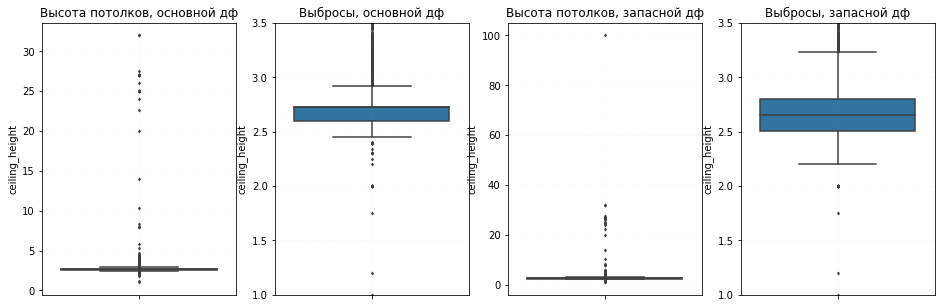

In [42]:
fig, ax= plt.subplots(ncols=4, figsize=(16,5))
sns.boxplot(y=realty['ceiling_height'], fliersize=2, ax=ax[0])
ax[0].set_title('Высота потолков, основной дф')
ax[0].grid(alpha=0.05, linestyle='--', linewidth=1)

sns.boxplot(y=realty['ceiling_height'], fliersize=2, ax=ax[1])
ax[1].set_title('Выбросы, основной дф')
ax[1].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[1].set_ylim(1,3.5)

sns.boxplot(y=ceil_real['ceiling_height'], fliersize=2, ax=ax[2])
ax[2].set_title('Высота потолков, запасной дф')
ax[2].grid(alpha=0.05, linestyle='--', linewidth=1)

sns.boxplot(y=ceil_real['ceiling_height'], fliersize=2, ax=ax[3])
ax[3].set_title('Выбросы, запасной дф')
ax[3].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[3].set_ylim(1, 3.5)

Выведем верхние и нижние границы выбросов по основному и дополнительному (запасному) датафреймам.

In [43]:
find_outliers(realty['ceiling_height'])

Нижняя и верхняя границы выбросов: 2.4,  2.9


In [45]:
find_outliers(ceil_real['ceiling_height'])

Нижняя и верхняя границы выбросов: 2.1,  3.2


Удаляем выбросы в столбце ceiling_height в обоих датафреймах.

In [46]:
realty = realty.query('2.4 <= ceiling_height <= 2.9')
ceil_real = ceil_real.query('2.1 <= ceiling_height <= 3.2')

#### Время экспозиции объявления

Рассмотрим время продажи квартиры. Поскольку в столбце с указанием дней экспозиции в сервисе (days_exposition) имеются пропущенные значения, для анализа времени продажи объекта фильтруем таблицу и отсекаем все пропуски.

In [47]:
realty_time_selling = realty[realty.loc[:,'days_exposition'].notnull()]
realty_time_selling['days_exposition'] = realty_time_selling['days_exposition'].astype('int')
realty_time_selling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17351 entries, 1 to 23695
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17351 non-null  int64         
 1   last_price            17351 non-null  float64       
 2   total_area            17351 non-null  float64       
 3   first_day_exposition  17351 non-null  datetime64[ns]
 4   rooms                 17351 non-null  int64         
 5   ceiling_height        17351 non-null  float64       
 6   floors_total          17351 non-null  int32         
 7   living_area           17351 non-null  float64       
 8   floor                 17351 non-null  int64         
 9   is_apartment          2040 non-null   object        
 10  studio                17351 non-null  bool          
 11  open_plan             17351 non-null  bool          
 12  kitchen_area          17351 non-null  float64       
 13  balcony         

Построим боксплот по столбцу days_exposition.

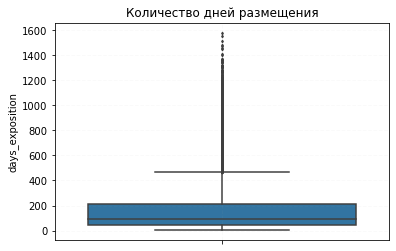

In [48]:
ax = sns.boxplot(y=realty_time_selling['days_exposition'], fliersize=2)
ax.set_title('Количество дней размещения')
ax.grid(alpha=0.05, linestyle='--', linewidth=1)

Выведем среднее и медиану, установим межквартильный размах и расчитаем верхнюю границу выбросов (она же - срок очень долгой продажи).

In [50]:
print(realty_time_selling['days_exposition'].describe())
print()

find_outliers(realty_time_selling['days_exposition'])

count    17351.000000
mean       169.344937
std        207.298067
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нижняя и верхняя границы выбросов: -213.5,  470.5


Среднее и медиана сильно отличаются друг от друга (169 и 90 дней соответственно). Это значит, что половина квартир продается за три месяца и меньше, но есть отдельные объекты, срок продажи которых крайне велик (что подтверждает максимальное значение, соответствующее 4,3 годам). Для четверти квартир требуется более 7-8 месяцев, чтобы сменить владельца. Если объявление провисело более 470 дней, то это можно назвать крайне долгой реализацией. Самые быстрые сроки продаж - не более полутора месяцев (в этот период реализуется 25% квартир).

Удалим все предельные значения.

In [52]:
realty_time_selling = realty_time_selling.query('days_exposition < 470')

Построим гистограмму частоты дней, когда объявление было доступно. Отдельной гистограммой выделим сегмент "поспешных продаж", когда квартиры продавались быстро.

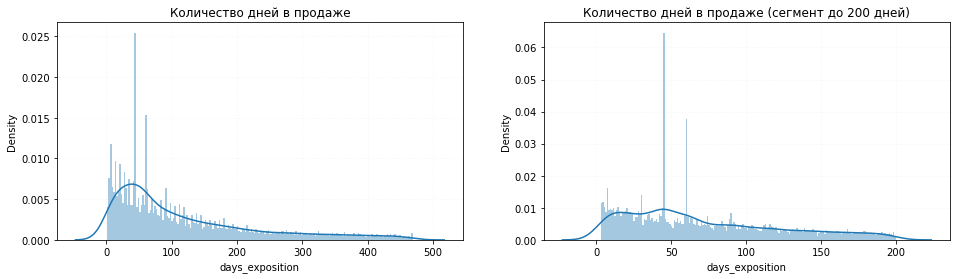

In [53]:
fig, ax= plt.subplots(ncols=2, figsize=(16,4))
sns.distplot(realty_time_selling['days_exposition'], bins=200, ax=ax[0])
sns.distplot(realty_time_selling[realty_time_selling['days_exposition'] <= 200]['days_exposition'], bins=200, ax=ax[1])
ax[0].set(title='Количество дней в продаже')
ax[0].grid(alpha=0.05, linestyle='--', linewidth=1)
ax[1].set(title='Количество дней в продаже (сегмент до 200 дней)')
ax[1].grid(alpha=0.05, linestyle='--', linewidth=1)

График не имеет резких изломов и переходов. Однако есть значительные выступы в районе примерно 7-8, 30, 45 (очень высокий столб), 60 и 90 дней. На всякий случай, проверим, правильно ли определены значения выступов.

In [54]:
print(realty_time_selling['days_exposition'].value_counts().head(15))

45    819
60    480
7     206
30    179
4     150
3     147
5     132
14    131
44    126
20    125
11    125
9     121
8     120
10    119
13    118
Name: days_exposition, dtype: int64


30, 60 и 90 дней - некая цикличность, которая, возможно, зависит от условий самого сервиса. Например, объявление периодически надо обновлять (или оплачивать), иначе через 30 дней оно снимается. И клиент рекламу разместил, квартиру продал, а публикацию не удалил. Вот она и висела там до автоматического удаления.
Тем не менее остается вопрос, откуда взялся пик в районе 45 дней (вспомним, что медиана у нас равна 44 дням - очень близкое к пику значение). Есть вероятность, что в графике сокрыто даже 2 цикла (один с периодичностью 30, другой - 45), и на 90 они сошлись.

### Выявление взаимозависимостей цены за квадратный метр и рядом параметров

Интересно оценить, как скорость продажи зависит от цены за квадратный метр.

In [55]:
realty_time_selling['days_exposition_group'] = pd.cut(realty_time_selling['days_exposition'],5)
display(realty_time_selling.groupby('days_exposition_group')['price_per_meter'].agg(['count','mean']))

,count,mean
days_exposition_group,,
"(0.532, 94.6]",8983,92372.580256
"(94.6, 188.2]",3470,90980.093194
"(188.2, 281.8]",1634,89389.306443
"(281.8, 375.4]",1032,89224.523162
"(375.4, 469.0]",760,89182.168846


Казалось бы, чем меньше цена, тем быстрее можно продать недвижимость. Однако с ростом периода продажи средняя стоимость за квадратный метр снижается. Предположительно связано с тем, что продавцы начинают потихоньку снижать цены, если квартиру не удалось реализовать быстро.

Для анализа факторов, влияющих на стоимость, создадим датафрейм с основными столбцами, где в колонке близости к центру нет отсутствующих значений. Выведем коэффициенты Пирсона.

In [56]:
realty_corr = pd.DataFrame(data = realty[realty['city_centers_nearest'].notnull()], columns = ['price_per_meter', 'total_area', 'rooms', 'city_centers_nearest', 'room_ratio', 'kitchen_ratio', 'ceiling_height','data_exposition','month_exposition', 'year_exposition'])
realty_corr.corr().style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area,rooms,city_centers_nearest,room_ratio,kitchen_ratio,ceiling_height,data_exposition,month_exposition,year_exposition
price_per_meter,1.000000,-0.055747,-0.273345,-0.404099,-0.287645,0.319741,0.196369,0.000089,-0.015554,0.139510
total_area,-0.055747,1.000000,0.788949,-0.109392,0.212531,-0.352858,0.186279,-0.004200,0.010135,-0.062278
rooms,-0.273345,0.788949,1.000000,-0.055089,0.555088,-0.597745,-0.056598,0.002338,0.001532,-0.027316
city_centers_nearest,-0.404099,-0.109392,-0.055089,1.000000,-0.000271,-0.021561,-0.123447,0.013633,-0.017627,0.019957
room_ratio,-0.287645,0.212531,0.555088,-0.000271,1.000000,-0.731034,-0.234137,0.006101,-0.015045,0.017416
kitchen_ratio,0.319741,-0.352858,-0.597745,-0.021561,-0.731034,1.000000,0.220091,-0.002829,-0.000171,0.006112
ceiling_height,0.196369,0.186279,-0.056598,-0.123447,-0.234137,0.220091,1.000000,-0.007336,0.019799,-0.177000
data_exposition,0.000089,-0.004200,0.002338,0.013633,0.006101,-0.002829,-0.007336,1.000000,-0.026749,-0.023253
month_exposition,-0.015554,0.010135,0.001532,-0.017627,-0.015045,-0.000171,0.019799,-0.026749,1.000000,-0.272424
year_exposition,0.139510,-0.062278,-0.027316,0.019957,0.017416,0.006112,-0.177000,-0.023253,-0.272424,1.000000


Стоимость одного квадратного метра имеет незначительную отрицательную корреляцию с общей площадью и слабую отрицательную с количеством комнат (здесь ничего необычного: чем больше помещений, тем дешевле квадратный метр).

Значение имеет и площадь кухни: ее величина способствует повышению цены. Выявлена небольшая отрицательная корреляция с жилой площадью: видимо, чем больше комнат, тем дешевле квадратный метр.

Удивительно, но близость к центру отрицательно сказывается на стоимости объекта. Возможно, результат объясняется тем, что в центре Петербурга много коммунальных квартир и старого жилья, требующего больших финансовых вложений. Т.е. имеется ряд факторов (влияющих на ценообразование, но не присутствующих в датасете), проявляющихся вот таким вот образом. Вдобавок необходимо учитывать, что в наборе данных кроме Санкт-Петербурга есть много других городов со своим понятием центра. Например, в центре Выборга квартира может стоить дороже, чем в поселке Первомайское, хотя Выборг находится дальше от центра Петербурга, чем искомый поселок.

Есть также небольшая положительная корреляция стоимости жилья с высотой потолков и годом продажи. Влияние месяца и даты на цену можно опустить.

Проверим на реальных данных, действительно ли имеется взаимосвязь цены и высоты потолков или это "эффект замены пропусков".

In [57]:
ceil_real.loc[:,'price_per_meter'] = ceil_real.loc[:,'last_price'] / ceil_real.loc[:,'total_area']
ceil_real.corr().style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,ceiling_height,city_centers_nearest,price_per_meter
last_price,1.000000,0.744849,0.417415,0.370178,-0.233219,0.651577
total_area,0.744849,1.000000,0.752585,0.400985,-0.186797,0.239032
rooms,0.417415,0.752585,1.000000,0.184734,-0.131452,-0.007052
ceiling_height,0.370178,0.400985,0.184734,1.000000,-0.312592,0.379272
city_centers_nearest,-0.233219,-0.186797,-0.131452,-0.312592,1.000000,-0.359490
price_per_meter,0.651577,0.239032,-0.007052,0.379272,-0.359490,1.000000


Корреляция оказалась даже более сильной. Чем выше потолок, тем дороже будет стоить квартира.

Проверим, как именно меняется цена в зависимости от количества комнат.

In [58]:
display(realty_corr.pivot_table(index='rooms', values=['total_area','price_per_meter']))

,price_per_meter,total_area
rooms,,
0,117555.336838,27.767238
1,107853.708937,37.529591
2,100829.107358,54.879207
3,94322.864744,72.245443
4,87976.371895,81.867495
5,89789.932645,95.232258
6,97497.332636,104.500000


Можно сделать вывод, что стоимость квадратного метра уменьшается с ростом числа комнат. Но до определенного момента. Когда объект становится очень большим и переходит в разряд элитной недвижимости, то его цена резко возрастает. Видимо, здесь играют роль дополнительные факторы вроде дорогой отделки, дизайнерской мебели и пр.

Посмотрим, как тип этажа влияет на стоимость объекта.

In [59]:
print(realty.pivot_table(index='floor_type', values='price_per_meter'))

            price_per_meter
floor_type                 
другой         95549.807805
первый         78181.736139
последний      82489.996986


Как и ожидалось, меньше всего ценятся квартиры на первом этаже. Скорее всего, из-за опасения квартирных краж, холодного пола или просто любопытных глаз прохожих. Чуть лучше обстоят дела с недвижимостью на последних этажах. Видимо, вид из окна красивый, да и соседи сверху не будут катать большой металлический шар по потолку. Но в лидеры рейтинга верхний этаж не вышел, вероятно, из-за устоявшегося в обществе мнения о ненадежности сантехнической инфраструктуры на чердаках и вечно протекающей кровли. Плюс не все дома оборудованы лифтом, что особенно актуально для лиц с ограниченными возможностями или мам с колясками. А самые дорогие - все некрайние этажи.

Попробуем установить характер взаимосвязи между стоимостью жилья и месяцем и годом публикации.

In [60]:
display(realty.pivot_table(index='year_exposition', values='price_per_meter'))
display(realty.pivot_table(index='month_exposition', values='price_per_meter'))

,price_per_meter
year_exposition,
2014,94526.025435
2015,91158.792991
2016,89212.277186
2017,89989.403952
2018,91878.241807
2019,98649.407157


,price_per_meter
month_exposition,
1,91340.519777
2,91084.877835
3,92383.329526
4,93008.711061
5,90998.713867
6,89395.344280
7,91313.362984
8,93161.031859
9,92713.974634


С 2015 года стоимость жилья сильно просела, и до 2016 года включительно цена только снижалась. Скорее всего, это связано с экономическим кризисом и падением доходов населения. С 2017 года рост возобновился, а в 2019 цены резко перегнали 2014 год. По месяцам сложно сказать, возможно, покупать квартиру чуть выгоднее летом, а продавать осенью. Но это не точно.

Посмотрим, как публикуются объявления в зависимости от дня недели.

In [61]:
print(realty['day_exposition'].value_counts())

Thursday     3504
Tuesday      3471
Friday       3370
Wednesday    3268
Monday       2992
Saturday     1608
Sunday       1445
Name: day_exposition, dtype: int64


Больше всего предложений вывешивают по четвергам и вторникам. Вторник - разгар рабочей недели, все уже вошли в ритм и активно размещают рекламу. Четверг - многие стремятся завершить дела к концу недели и не портить пятничный вечер снежным комом дел.
Относительно небольшое количество публикаций по выходным, возможно, связано с тем, что многие продают недвижимость через риэлторов, которые по субботам и воскресеньям отдыхают. 

### Отбор записей по цетральному району Петербурга и анализ корреляций уровня цен

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [62]:
realty_locality_mean = realty.groupby('locality_name', as_index=False).agg({'price_per_meter': 'mean',
                                                                           'data_exposition': 'count'})
realty_top10 = realty_locality_mean.sort_values(by='data_exposition', ascending=False).head(10)
display(realty_top10)

,locality_name,price_per_meter,data_exposition
33,Санкт-Петербург,104783.561143,12344
262,посёлок Мурино,85657.825846,513
294,посёлок Шушары,78546.808778,434
3,Всеволожск,66986.635291,382
267,посёлок Парголово,90332.263023,326
13,Колпино,75476.133827,318
32,Пушкин,101048.036633,313
87,деревня Кудрово,92463.092416,297
6,Гатчина,69030.911825,283
4,Выборг,57871.296452,204


Добавим столбец с расстоянием до центра в километрах.

In [63]:
realty_spb = realty[realty['locality_name'] == 'Санкт-Петербург']
realty_spb.loc[:, 'city_centers_km'] = (realty_spb.loc[:, 'city_centers_nearest'] / 1000).round()
print(realty_spb.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12344 entries, 0 to 23691
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          12344 non-null  int64         
 1   last_price            12344 non-null  float64       
 2   total_area            12344 non-null  float64       
 3   first_day_exposition  12344 non-null  datetime64[ns]
 4   rooms                 12344 non-null  int64         
 5   ceiling_height        12344 non-null  float64       
 6   floors_total          12344 non-null  int32         
 7   living_area           12344 non-null  float64       
 8   floor                 12344 non-null  int64         
 9   is_apartment          1399 non-null   object        
 10  studio                12344 non-null  bool          
 11  open_plan             12344 non-null  bool          
 12  kitchen_area          12344 non-null  float64       
 13  balcony         

Посчитаем среднюю цену для каждого километра.

In [64]:
realty_spb.loc[:,'price_per_km'] = realty_spb.loc[:,'price_per_meter'] / realty_spb.loc[:,'city_centers_km']
display(realty_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_exposition,data_exposition,month_exposition,year_exposition,floor_type,room_ratio,kitchen_ratio,city_centers_km,price_per_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,Thursday,7,3,2019,другой,0.472222,0.231481,16.0,7523.148148
2,10,5196000.0,56.0,2015-08-20,2,2.73,5,34.300000,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,Thursday,20,8,2015,другой,0.612500,0.148214,14.0,6627.551020
7,5,7915000.0,71.6,2019-04-18,2,2.73,24,40.449502,22,NaN,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,Thursday,18,4,2019,другой,0.564937,0.263966,12.0,9212.057728
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,Sunday,26,2,2017,другой,0.714754,0.106557,15.0,5901.639344
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,3,NaN,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,Thursday,16,11,2017,другой,0.512626,0.214646,14.0,9108.946609


Сформируем сводную таблицу для расчета средней стоимости квадратного метра в зависимости от удаления от центра Петербурга. По результатам таблицы построим график.

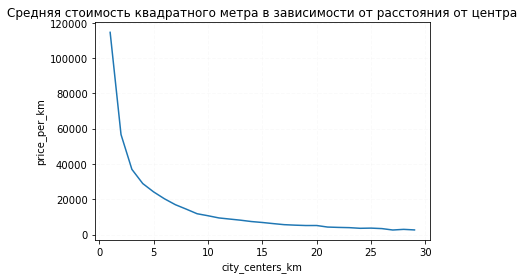

In [65]:
mean_price_per_km = realty_spb.pivot_table(index='city_centers_km', values='price_per_km', aggfunc='mean')
sns.lineplot(x='city_centers_km', y='price_per_km', data=mean_price_per_km)
plt.title('Средняя стоимость квадратного метра в зависимости от расстояния от центра')
plt.grid(alpha=0.05, linestyle='--', linewidth=1)

На графике заметен излом в районе 2,5-3 км от центра. Далее установим, что центральный район находится в радиусе 3х км от центральной точки. Выделим этот сегмент квартир в центре.

In [66]:
realty_spb_center = pd.DataFrame(data = realty_spb.query('city_centers_km <= 3'), columns =['price_per_meter','total_area','rooms','city_centers_km','room_ratio','kitchen_ratio', 'floor_type', 'ceiling_height', 'day_exposition', 'data_exposition','month_exposition', 'year_exposition'])
realty_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 24 to 23602
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_per_meter   265 non-null    float64
 1   total_area        265 non-null    float64
 2   rooms             265 non-null    int64  
 3   city_centers_km   265 non-null    float64
 4   room_ratio        265 non-null    float64
 5   kitchen_ratio     265 non-null    float64
 6   floor_type        265 non-null    object 
 7   ceiling_height    265 non-null    float64
 8   day_exposition    265 non-null    object 
 9   data_exposition   265 non-null    int64  
 10  month_exposition  265 non-null    int64  
 11  year_exposition   265 non-null    int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 26.9+ KB


Посмотрим, от чего зависит цена в центральном районе.

In [67]:
realty_spb_center.corr().style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area,rooms,city_centers_km,room_ratio,kitchen_ratio,ceiling_height,data_exposition,month_exposition,year_exposition
price_per_meter,1.000000,-0.189634,-0.115229,-0.066486,-0.079064,0.143454,-0.107711,-0.041527,-0.038005,0.261757
total_area,-0.189634,1.000000,0.707601,-0.081971,0.258184,-0.264105,0.116364,0.051782,-0.013390,-0.138806
rooms,-0.115229,0.707601,1.000000,-0.127293,0.479735,-0.420919,0.150508,0.025297,0.003827,-0.099872
city_centers_km,-0.066486,-0.081971,-0.127293,1.000000,-0.025151,0.048913,0.051946,0.025219,-0.033135,0.125569
room_ratio,-0.079064,0.258184,0.479735,-0.025151,1.000000,-0.651879,0.176445,0.051721,0.045114,-0.074179
kitchen_ratio,0.143454,-0.264105,-0.420919,0.048913,-0.651879,1.000000,-0.085325,-0.143241,0.011237,0.133047
ceiling_height,-0.107711,0.116364,0.150508,0.051946,0.176445,-0.085325,1.000000,-0.119387,0.022600,0.052603
data_exposition,-0.041527,0.051782,0.025297,0.025219,0.051721,-0.143241,-0.119387,1.000000,-0.076956,-0.119739
month_exposition,-0.038005,-0.013390,0.003827,-0.033135,0.045114,0.011237,0.022600,-0.076956,1.000000,-0.288575
year_exposition,0.261757,-0.138806,-0.099872,0.125569,-0.074179,0.133047,0.052603,-0.119739,-0.288575,1.000000


Ситуация на рынке жилья в центре Петербурга похожа на общую картину по городу и ЛО в целом, но с небольшими отличиями. Наблюдается аналогичная слабая обратная корреляция между стоимостью квадратного метра и общей площадью. 
Ожидаемо уменьшается стоимость одного квадрата при увеличении количества комнат, так же отрицательно влияет и близость центра. А вот высота потолков теперь приобрела даже отрицательное значение (позже этот факт проверим на дополнительном датасете, где пропуски были удалены, а не заменены).

Посмотрим, сохранена ли общая тенденция уменьшения стоимости квадратного метра при росте числа комнат (до определенного момента).

In [68]:
display(realty_spb_center.pivot_table(index='rooms', values=['total_area','price_per_meter']))

,price_per_meter,total_area
rooms,,
0,131250.000000,16.000000
1,117132.813320,38.629630
2,112840.142687,63.746698
3,113321.332334,78.290510
4,103567.475495,93.837931
5,126100.697242,100.966667
6,81981.981982,111.000000


Влияние количества комнат и метража на стоимость одинакова для обоих групп (общей по Петербургу и ЛО и усеченной до центра Петербурга).

Посмотрим, сохранена ли зависимость от типа этажа.

In [69]:
print(realty_spb_center.pivot_table(index='floor_type', values='price_per_meter'))

            price_per_meter
floor_type                 
другой        115438.401004
первый        102505.631960
последний     114510.235850


Да, типам этажей одинаково придается значение что в центре Петербурга, что на его окраинах, что в Ленинградской области.

Проверим, действительно ли высота потолков не важна. Или такой результат появился благодаря нашему вмешательству.

In [70]:
ceil_real = ceil_real[ceil_real['locality_name'] == 'Санкт-Петербург']
ceil_real.loc[:, 'city_centers_km'] = (ceil_real.loc[:, 'city_centers_nearest'] / 1000).round()
ceil_real.corr().style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,ceiling_height,city_centers_nearest,price_per_meter,city_centers_km
last_price,1.000000,0.758282,0.434482,0.356578,-0.291295,0.646437,-0.290420
total_area,0.758282,1.000000,0.749118,0.411917,-0.281973,0.232766,-0.281058
rooms,0.434482,0.749118,1.000000,0.213232,-0.225042,-0.027471,-0.223550
ceiling_height,0.356578,0.411917,0.213232,1.000000,-0.466750,0.358025,-0.465976
city_centers_nearest,-0.291295,-0.281973,-0.225042,-0.466750,1.000000,-0.345711,0.998004
price_per_meter,0.646437,0.232766,-0.027471,0.358025,-0.345711,1.000000,-0.345702
city_centers_km,-0.290420,-0.281058,-0.223550,-0.465976,0.998004,-0.345702,1.000000


Замена пропусков средним была ошибкой. Данные в основном датафрейме "сгладились", и взаимосвязь стоимости и высоты потолков была скрыта. Правильным будем считать результат, полученный от "чистого" датасета с удаленными пропусками (коэффициэнт Пирсона = 0.35). Отметим также и тот факт, что в запасном наборе цена квадратного метра положительно коррелирует с площадью.

### Вывод

В разделе выделены основные факторы, влияющие на формирование конечной стоимости недвижимости.

В большой и малой группах (ПиЛО - Петербург и ЛО, ЦП - центр Петербурга) общий метраж показал отрицательную корреляцию с ценой. Зависимость между ценой и количеством комнат в обеих группах не совсем линейная. Стоимость за квадратный метр падает с ростом числа комнат, затем снова идет вверх, а потом снижается.

В обеих группах положительно влияют на цену высокие потолки и большая кухня.

Самые недорогие этажи - нижние, следом последние верхние, а за любой другой этаж придется раскошелиться еще сильнее.

Неожиданно отрицательную корреляцию показала близость к центру. Возможно, речь идет не о недостатках жизни в сердце Петербурга, а о наличии там старого жилого фонда, который объективно может стоить дешевле. Что касается группы ПиЛО, то здесь учитываются и другие населенные пункты, кроме Петербурга. Например, квартира в центре Выборга может стоить дороже квартиры на его окраине, хотя эта окраина географически расположена ближе к Петербургу. 

Наблюдается также взаимосвязь между стоимостью и годом продажи. В основном, стоимость растет с каждым годом, но здесь имеется провал 2015-2018гг. Скорее всего, это влияние объективных рыночных законов и потрясений, произошедших в экономике в 2014г (тогда курс рубля сильно просел). Спрос на недвижимость ожидаемо упал, а рынок отреагировал на это снижением цен в 2015г (всегда есть временной лаг).

А вот влияние месяца и даты публикации объявления на уровень цен не выявлено, что в ЛО и Петербурге, что в его центре.

## Общий вывод

Для оценки стоимости жилья следует учитывать целую совокупность факторов: общую площадь и количество комнат, высокие потолки и площадь кухни, тип этажа и близость к центру, а также общую ситуацию на рынке.

Подавляющая часть результатов оказалась вполне предсказуемой. Однако, были итоги, которые удивили. Например, отрицательная корреляция с центром города или жилой площадью в центре Петербурга. 

Влияние факторов на рынки жилья в разных группах (ПиЛО и ЦП) можно считать идентичным.

В процессе исследования из набора отброшены квартиры с очень большой стоимостью и площадью. Во-первых, единичные сверхвысокие значения могут сильно исказить результаты исследования. Во-вторых, сложно оценить стоимость подобных объектов, руководствуясь только приведенными в датасете параметрами. Например, значительную роль здесь могут сыграть дорогой ремонт, мебель, присутствие антиквариата, гардеробной, наличие фитнес-центра для владельцев недвижимости и прочие факторы.

В исследовании не учтен такой крайне важный фактор, как удаленность от станций метро. Возможность попасть быстро из точки А в точку Б для жителей крупных городов является очень важной. Нет данных о годе постройки дома (по этому параметру можно предположить состояние строения) и наличия лифта.

Вопрос вызывает массовое размещение объявлений на 45 дней. Это техническая ошибка или есть какое-то условие публикации на сервисе?
Для более детального анализа необходимо проставить координаты населенных пунктов (там, где они пропущены). Также рекомендуется проверить порядок заполнения параметра высоты потолков (ceiling_height), поскольку там присутствует много подозрительных значений.